This part is working to:
1. Gain a preliminary understanding of data
2. Merge the files

In [1]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import glob
# import seaborn as sns
# %matplotlib inline
from matplotlib_venn import venn3

In [2]:
file_paths=glob.glob("../data/*.csv")
print(file_paths)
data_budget=pd.read_csv(file_paths[0])
data_account=pd.read_csv(file_paths[1])
data_transaction=pd.read_csv(file_paths[2])

['../data/Data_budget.csv', '../data/Data_account.csv', '../data/Data_Transaction.csv']


## 1. Analyse data_budget

### 1.1 Preliminary analyse

In [3]:
data_budget.head()

,currency,budget,status,budget_cut_weekly,goal_id,wealth_growth,monthly_max_saving,budget_daily,feasible,budget_monthly,...,start_date,category,monthly_avg_income,amount,budget_cut_daily,current_goal_budget_cut_by_day,budget_weekly,snapshot,goal_name,remarks
0,USD,{'Others': {'budget_weekly': 1.984466361099931...,In progress,35.280294,23068219672,0.0,-167.438712,0.112001,False,3.360028,...,2021-05-15,Saving,154.561288,463.683864,5.040042,5.040042,0.784007,"{'monthly': {'budget_monthly': 3.360028, 'amou...",Emergency Fund,Your Emergency Fund for 3 months
1,HKD,"{'Others': {'budget_weekly': 3.19084248957671,...",In progress,29.083871,83968004351,0.0,-167.438712,0.997204,False,29.916127,...,2021-05-15,Dining,154.561288,1000.000000,4.154839,4.154839,6.980430,{'monthly': {'budget_monthly': 29.916126709677...,cheaper food,NaN
2,USD,{'Others': {'budget_weekly': 1.984466361099931...,In progress,35.280294,23068219672,0.0,-167.438712,0.112001,False,3.360028,...,2021-05-15,Saving,154.561288,463.683864,5.040042,5.040042,0.784007,"{'monthly': {'budget_monthly': 3.360028, 'amou...",Emergency Fund,Your Emergency Fund for 3 months
3,HKD,"{'Others': {'budget_weekly': 3.19084248957671,...",In progress,29.083871,83968004351,0.0,-167.438712,0.997204,False,29.916127,...,2021-05-15,Dining,154.561288,1000.000000,4.154839,4.154839,6.980430,{'monthly': {'budget_monthly': 29.916126709677...,cheaper food,NaN
4,USD,{'Others': {'budget_weekly': 1.984466361099931...,In progress,35.280294,23068219672,0.0,-167.438712,0.112001,False,3.360028,...,2021-05-15,Saving,154.561288,463.683864,5.040042,5.040042,0.784007,"{'monthly': {'budget_monthly': 3.360028, 'amou...",Emergency Fund,Your Emergency Fund for 3 months


In [4]:
data_budget.columns

Index(['currency', 'budget', 'status', 'budget_cut_weekly', 'goal_id',
       'wealth_growth', 'monthly_max_saving', 'budget_daily', 'feasible',
       'budget_monthly', 'psid', 'saved_amount', 'created_at', 'diff2target',
       'monthly_min_expense', 'completion_rate', 'budget_cut_monthly',
       'due_date', 'updated_at', 'difficulty_idx', 'delta', 'start_date',
       'category', 'monthly_avg_income', 'amount', 'budget_cut_daily',
       'current_goal_budget_cut_by_day', 'budget_weekly', 'snapshot',
       'goal_name', 'remarks'],
      dtype='object')

In [5]:
data_budget.describe()

,budget_cut_weekly,goal_id,wealth_growth,monthly_max_saving,budget_daily,budget_monthly,saved_amount,diff2target,monthly_min_expense,completion_rate,budget_cut_monthly,difficulty_idx,delta,monthly_avg_income,amount,budget_cut_daily,current_goal_budget_cut_by_day,budget_weekly
count,4.472000e+03,4.472000e+03,4472.000000,4472.000000,4.472000e+03,4.472000e+03,4.472000e+03,4.472000e+03,4472.000000,4472.000000,4.472000e+03,4472.000000,4472.000000,4472.000000,4.472000e+03,4.472000e+03,4.472000e+03,4.472000e+03
mean,5.485044e+05,5.474763e+10,6.026433,3441.634911,-7.821544e+04,-2.346463e+06,7.821675e+04,9.597608e+04,1119.924530,0.332089,2.351025e+06,5.057916,64.152057,4561.559441,6.229693e+05,7.836749e+04,7.834242e+04,-5.475081e+05
std,2.148585e+06,2.682073e+10,23.715659,3858.039011,3.069583e+05,9.208750e+06,3.069698e+05,3.265901e+05,1460.172946,0.428168,9.208148e+06,4.474686,48.548796,3840.569917,2.380396e+06,3.069383e+05,3.069446e+05,2.148708e+06
min,1.822800e-02,2.462845e+09,0.000000,-6556.870544,-1.288927e+06,-3.866780e+07,0.000000e+00,0.000000e+00,51.804500,0.000000,7.812000e-02,0.000000,1.000000,0.079856,2.395680e-01,2.604000e-03,2.604000e-03,-9.022486e+06
25%,2.041993e+01,3.086210e+10,0.000000,37.654231,4.734800e-01,1.420440e+01,0.000000e+00,0.000000e+00,103.040000,0.000000,8.751398e+01,0.000000,21.000000,154.561288,2.683762e+02,2.917133e+00,2.917133e+00,3.314360e+00
50%,1.680889e+02,5.413767e+10,0.005675,2099.440000,7.334410e+01,2.200323e+03,7.341600e+01,5.012546e+01,1379.712040,0.122159,9.432893e+02,4.000000,77.000000,2204.190000,1.200000e+03,3.144298e+01,1.098266e+01,5.134087e+02
75%,5.785406e+02,7.411549e+10,0.023538,7794.821440,2.011392e+02,6.034176e+03,1.046947e+03,1.103354e+03,1380.783245,1.000000,3.296703e+03,10.000000,92.000000,9174.533480,1.000000e+04,1.098901e+02,2.255750e+01,1.407974e+03
max,9.023000e+06,9.543142e+10,99.574022,7800.872031,2.698503e+02,8.095509e+03,1.289072e+06,1.288935e+06,6556.950400,1.000000,3.867000e+07,10.000000,177.000000,9181.655276,1.000000e+07,1.289000e+06,1.289000e+06,1.888952e+03


In [6]:
data_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   currency                        4472 non-null   object 
 1   budget                          4472 non-null   object 
 2   status                          4472 non-null   object 
 3   budget_cut_weekly               4472 non-null   float64
 4   goal_id                         4472 non-null   int64  
 5   wealth_growth                   4472 non-null   float64
 6   monthly_max_saving              4472 non-null   float64
 7   budget_daily                    4472 non-null   float64
 8   feasible                        4472 non-null   bool   
 9   budget_monthly                  4472 non-null   float64
 10  psid                            4472 non-null   object 
 11  saved_amount                    4472 non-null   float64
 12  created_at                      44

### key takeaway for this section: 
1. no null/missing value(remarks has some null field, but irrelevant)
2. 4472 rows, 31 columns
3. dtypes: bool(1), float64(15), int64(3), object(12)


### 1.2 Analyse catogorical columns

In [7]:
catg_bgt=data_budget.select_dtypes(include=['object']).columns
catg_bgt

Index(['currency', 'budget', 'status', 'psid', 'created_at', 'due_date',
       'updated_at', 'start_date', 'category', 'snapshot', 'goal_name',
       'remarks'],
      dtype='object')

#### 1.2.1 see the details of some import columns

In [8]:
print(len(pd.unique(data_budget['psid'])))
print(len(data_budget))

1287
4472


In [9]:
for c in ['currency',  'status',  'category',  'goal_name','remarks']:
    print(c)
    print(data_budget[c].value_counts(),"\n")

currency
HKD    3654
USD     818
Name: currency, dtype: int64 

status
In progress    3053
Completed      1149
Failed          270
Name: status, dtype: int64 

category
Dining           1356
Saving           1088
Education         609
Home / Family     540
Leisure           339
Property          270
Healthcare        270
Name: category, dtype: int64 

goal_name
Emergency Fund                    818
oreo                              339
test                              270
again                             270
goal1                             270
iekairitai                        270
add a infeasible how              270
asdf                              270
Target12 - mc                     270
oeas                              270
testing                           270
kakin                             270
goal                              270
oreo journey impossible May 14     69
Oreo course                        69
oreo journey May 14                69
cheaper food                

### key takeaway for this section: 
Group by usid, do the average
1. convert the currency to HKD
2. convert the status to "In progress","Completed","Failed"
3. convert category to 'Dining', 'Saving', 'Education', 'Home / Family', 'Leisure', 'Healthcare', 'Property'
4. Drop goal_name, remark

#### 1.2.2 closer look into budget,snapshot(str to dict)

In [10]:
# Take the first row as an example
import json
def extract(string):
    string=string.replace("\'","\"")
    string=string.replace("True","1")
    string=string.replace("False","0")
    convertedDict = json.loads(string)
    return convertedDict

def cvt_dict(convertedDict,indent=0):
    for key in convertedDict:
        if type(convertedDict[key]) is dict:
            print((" ")*indent, key)
            cvt_dict(convertedDict[key],indent+2)
        else:
            print((" ")*indent,key,convertedDict[key])
            
str_budget=data_budget.iloc[0:1]['budget'].values.tolist()[0]
str_snapshot=data_budget.iloc[0:1]['snapshot'].values.tolist()[0]
budget_dict=extract(str_budget)
snapshot_dict=extract(str_snapshot)

In [11]:
# check the budget_dict
for key in budget_dict:
    print(key,budget_dict[key],"\n")

Others {'budget_weekly': 1.984466361099931, 'weight': 0.1582632193162101, 'budget_monthly': 8.504855833285418, 'budget_daily': 0.28349519444284726} 

Leisure {'budget_weekly': 0.0, 'weight': 0.0, 'budget_monthly': 0.0, 'budget_daily': 0.0} 

Transportation {'budget_weekly': 0.0, 'weight': 0.0, 'budget_monthly': 0.0, 'budget_daily': 0.0} 

Financials {'budget_weekly': 28.27055099422452, 'weight': 0.0, 'budget_monthly': 121.15950426096224, 'budget_daily': 4.038650142032075} 

Dining & Beverage {'budget_weekly': 0.0, 'weight': 0.0, 'budget_monthly': 0.0, 'budget_daily': 0.0} 

Healthcare {'budget_weekly': 0.0, 'weight': 0.0, 'budget_monthly': 0.0, 'budget_daily': 0.0} 

Shopping {'budget_weekly': 0.0, 'weight': 0.0, 'budget_monthly': 0.0, 'budget_daily': 0.0} 

Home {'budget_weekly': 0.0, 'weight': 0.0, 'budget_monthly': 0.0, 'budget_daily': 0.0} 



In [12]:
# check the snapshot_dict
cvt_dict(snapshot_dict)

 monthly
   budget_monthly 3.360028
   amount 463.68386399999997
   budget_cut_monthly 151.20126
   monthly_min_expense 322.0
   monthly_max_saving -167.438712
   difficulty_idx 10.0
   budget_daily 0.11200093333333333
   budget_cut_daily 5.040042
   monthly_avg_income 154.561288
   current_goal_budget_cut_by_day 5.040042
   budget_weekly 0.7840065333333333
   diff2target 977.1625808
   feasible 0
   budget
     Others
       budget_weekly 1.984466361099931
       weight 0.1582632193162101
       budget_monthly 8.504855833285418
       budget_daily 0.28349519444284726
     Leisure
       budget_weekly 0.0
       weight 0.0
       budget_monthly 0.0
       budget_daily 0.0
     Transportation
       budget_weekly 0.0
       weight 0.0
       budget_monthly 0.0
       budget_daily 0.0
     Financials
       budget_weekly 28.27055099422452
       weight 0.0
       budget_monthly 121.15950426096224
       budget_daily 4.038650142032075
     Dining & Beverage
       budget_weekly 0.0
      

In [13]:
# Question: what is snapshot? the monthly,quarterly,weekly seem to be same 
def split_snapshot(ss):
    ss=ss[1:-1].replace("\'monthly\': ","\n")
    ss=ss[1:].replace("\'quarterly\': ","\n")
    ss=ss.replace("\'weekly\': ","\n")
    arr=ss.split("\n")
    if arr[0]==arr[1] and arr[0][:-2]==arr[2]:
        return True
    else:
        return False
    
cnt=0
l=len(data_budget['snapshot'])
for ele in data_budget['snapshot']:
    if split_snapshot(ele):
        cnt+=1
print('{:.2%} of the monthly,quarterly,weekly budge in snapshot is the same'.format(cnt/l))

81.89% of the monthly,quarterly,weekly budge in snapshot is the same


In [14]:
# Question: Difference between monthly data of snapshot and budget_dict
set1=snapshot_dict['monthly'].keys()
set2=set(data_budget.columns.values)
intc=set1&set2
print(set1-intc)
print(set2-intc)

set()
{'completion_rate', 'psid', 'due_date', 'currency', 'category', 'updated_at', 'goal_id', 'saved_amount', 'delta', 'wealth_growth', 'start_date', 'snapshot', 'goal_name', 'remarks', 'created_at', 'status'}


### key takeaway for this section: 
1. most monthly,quarterly,weekly budge in snapshot is the same
2. snapshot do not give addition info
3. drop snapshot and so on
4. convert budget_dict to these attribute:

Others_weekly, Others_monthly, Others_daily
Leisure_weekly, Leisure_monthly, Leisure_daily
Transportation_weekly, Transportation_monthly, Transportation_daily
Financials_weekly, Financials_monthly, Financials_daily
Dining & Beverage_weekly, Dining & Beverage_monthly, Dining & Beverage_daily
Healthcare_weekly, Healthcare_monthly, Healthcare_daily
Shopping_weekly, Shopping_monthly, Shopping_daily
Home_weekly, Home_monthly, Home_daily

In [15]:
whole_str_budget=data_budget['budget'].values.tolist()
detail_dict=dict()
i=0
for single_str_budget in whole_str_budget:
    single_budget_dict=extract(single_str_budget)
    for key in single_budget_dict:
        dd=single_budget_dict[key]
        for ele in ['_weekly','_monthly','_daily']:
            name=key+ele
            if name not in detail_dict.keys():
                value=[]
            else:
                value=detail_dict[name]
            value.append(dd['budget'+ele])
            detail_dict[name]=value

### 1.3 Analyse numerical columns

In [16]:
cs=data_budget.select_dtypes(exclude=['object']).columns
print(cs)

Index(['budget_cut_weekly', 'goal_id', 'wealth_growth', 'monthly_max_saving',
       'budget_daily', 'feasible', 'budget_monthly', 'saved_amount',
       'diff2target', 'monthly_min_expense', 'completion_rate',
       'budget_cut_monthly', 'difficulty_idx', 'delta', 'monthly_avg_income',
       'amount', 'budget_cut_daily', 'current_goal_budget_cut_by_day',
       'budget_weekly'],
      dtype='object')


In [17]:
data_budget.iloc[0:1][cs]

,budget_cut_weekly,goal_id,wealth_growth,monthly_max_saving,budget_daily,feasible,budget_monthly,saved_amount,diff2target,monthly_min_expense,completion_rate,budget_cut_monthly,difficulty_idx,delta,monthly_avg_income,amount,budget_cut_daily,current_goal_budget_cut_by_day,budget_weekly
0,35.280294,23068219672,0.0,-167.438712,0.112001,False,3.360028,0.0,977.162581,322.0,0.0,151.20126,10,92,154.561288,463.683864,5.040042,5.040042,0.784007


### key takeaway for this section: 
1. drop goal_id
2. convert feasible columns to catogory

### 1.4 Clear the Data base on Takeaways

#### 1.4.1 do the conversion

In [18]:
def get_ratio(c_type):
    if c_type=="HKD":
        return 1
    elif c_type=="USD":
        return 7.8
    elif c_type=="EUR":
        return 9.2
    elif c_type=="CNY":
        return 1.2
    elif c_type=="JPY":
        return 0.07
    elif c_type=="GBP":
        return 10.7

In [19]:
cs=cs.drop(['feasible'])

def curreny_conversion(arrLike):  
    ratio = get_ratio(arrLike['currency'])
    arrLike[cs]*=ratio
    return arrLike

data_budget = data_budget.apply(curreny_conversion,axis=1)

In [20]:
for kk in detail_dict:
    print(kk)
    data_budget[kk]=np.array(detail_dict[kk])

Others_weekly
Others_monthly
Others_daily
Leisure_weekly
Leisure_monthly
Leisure_daily
Transportation_weekly
Transportation_monthly
Transportation_daily
Financials_weekly
Financials_monthly
Financials_daily
Dining & Beverage_weekly
Dining & Beverage_monthly
Dining & Beverage_daily
Healthcare_weekly
Healthcare_monthly
Healthcare_daily
Shopping_weekly
Shopping_monthly
Shopping_daily
Home_weekly
Home_monthly
Home_daily


In [21]:
data_budget.drop(['goal_id','budget', 'created_at', 'due_date', 'updated_at', 'start_date',
       'snapshot', 'goal_name', 'remarks'],axis=1,inplace=True)

In [22]:
data_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   currency                        4472 non-null   object 
 1   status                          4472 non-null   object 
 2   budget_cut_weekly               4472 non-null   float64
 3   wealth_growth                   4472 non-null   float64
 4   monthly_max_saving              4472 non-null   float64
 5   budget_daily                    4472 non-null   float64
 6   feasible                        4472 non-null   bool   
 7   budget_monthly                  4472 non-null   float64
 8   psid                            4472 non-null   object 
 9   saved_amount                    4472 non-null   float64
 10  diff2target                     4472 non-null   float64
 11  monthly_min_expense             4472 non-null   float64
 12  completion_rate                 44

In [23]:
cvt_status=pd.get_dummies(data_budget.status)
cvt_category=pd.get_dummies(data_budget.category)
data_budget.drop(['status','category','currency'],axis=1,inplace=True)
data_budget = data_budget.join(cvt_status)
data_budget = data_budget.join(cvt_category)

In [24]:
data_budget.select_dtypes(include=['object']).columns

Index(['psid'], dtype='object')

In [25]:
data_budget.select_dtypes(exclude=['object']).columns

Index(['budget_cut_weekly', 'wealth_growth', 'monthly_max_saving',
       'budget_daily', 'feasible', 'budget_monthly', 'saved_amount',
       'diff2target', 'monthly_min_expense', 'completion_rate',
       'budget_cut_monthly', 'difficulty_idx', 'delta', 'monthly_avg_income',
       'amount', 'budget_cut_daily', 'current_goal_budget_cut_by_day',
       'budget_weekly', 'Others_weekly', 'Others_monthly', 'Others_daily',
       'Leisure_weekly', 'Leisure_monthly', 'Leisure_daily',
       'Transportation_weekly', 'Transportation_monthly',
       'Transportation_daily', 'Financials_weekly', 'Financials_monthly',
       'Financials_daily', 'Dining & Beverage_weekly',
       'Dining & Beverage_monthly', 'Dining & Beverage_daily',
       'Healthcare_weekly', 'Healthcare_monthly', 'Healthcare_daily',
       'Shopping_weekly', 'Shopping_monthly', 'Shopping_daily', 'Home_weekly',
       'Home_monthly', 'Home_daily', 'Completed', 'Failed', 'In progress',
       'Dining', 'Education', 'Healthcare

#### 1.4.2 how to group the data

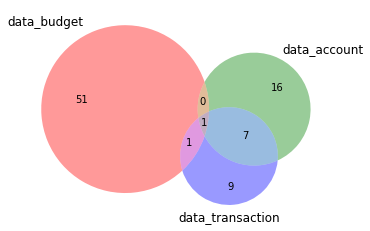

In [26]:
budget_set=set(data_budget.columns)
account_set=set(data_account.columns)
transaction_set=set(data_transaction.columns)
v=venn3([budget_set, account_set,transaction_set])
v.get_label_by_id('A').set_text('data_budget')
v.get_label_by_id('B').set_text('data_account')
v.get_label_by_id('C').set_text('data_transaction')
plt.show()

In [27]:
print(budget_set&account_set&transaction_set)

{'psid'}


### key takeaway for this section: 
1. use psid to link three dataset

In [28]:
df=data_budget.groupby('psid').mean()

In [29]:
df.columns

Index(['budget_cut_weekly', 'wealth_growth', 'monthly_max_saving',
       'budget_daily', 'feasible', 'budget_monthly', 'saved_amount',
       'diff2target', 'monthly_min_expense', 'completion_rate',
       'budget_cut_monthly', 'difficulty_idx', 'delta', 'monthly_avg_income',
       'amount', 'budget_cut_daily', 'current_goal_budget_cut_by_day',
       'budget_weekly', 'Others_weekly', 'Others_monthly', 'Others_daily',
       'Leisure_weekly', 'Leisure_monthly', 'Leisure_daily',
       'Transportation_weekly', 'Transportation_monthly',
       'Transportation_daily', 'Financials_weekly', 'Financials_monthly',
       'Financials_daily', 'Dining & Beverage_weekly',
       'Dining & Beverage_monthly', 'Dining & Beverage_daily',
       'Healthcare_weekly', 'Healthcare_monthly', 'Healthcare_daily',
       'Shopping_weekly', 'Shopping_monthly', 'Shopping_daily', 'Home_weekly',
       'Home_monthly', 'Home_daily', 'Completed', 'Failed', 'In progress',
       'Dining', 'Education', 'Healthcare

In [30]:
df.to_csv("out.csv",index=True)

## 2. Analyse data_account

### 2.1 Preliminary analyse

In [31]:
#take the first one as example
for i in data_account[0:1].columns:
    print(data_account[0:1][i].name,data_account[0:1][i].values)

psid ['customer_1']
account_id ['482625418285812233']
nature ['savings']
created_at ['2021-05-15T09:56:49Z']
balance_by_day ["{'2021-04-17': 7864.6, '2021-04-16': 7864.6, '2021-04-15': 7864.6, '2021-04-14': 7864.6, '2021-04-13': 7864.6, '2021-04-12': 7864.6, '2021-04-11': 7864.6, '2021-04-10': 7864.6, '2021-04-09': 6864.6, '2021-04-08': 6864.6, '2021-04-07': 6864.6, '2021-04-06': 6864.6, '2021-04-05': 6864.6, '2021-04-04': 6864.6, '2021-04-03': 8864.6, '2021-04-02': 8864.6, '2021-04-01': 7653.04, '2021-03-31': 9653.04, '2021-03-30': 9653.04, '2021-05-01': 10129.6, '2021-05-02': 8129.6, '2021-05-03': 8129.6, '2021-05-04': 8129.6, '2021-05-05': 8129.6, '2021-05-06': 8129.6, '2021-03-29': 9653.04, '2021-05-07': 8129.6, '2021-03-28': 9653.04, '2021-05-08': 8129.6, '2021-03-27': 9653.03, '2021-05-09': 8129.6, '2021-03-26': 9653.03, '2021-03-25': 10154.03, '2021-03-24': 10154.03, '2021-03-23': 10154.03, '2021-03-22': 10154.03, '2021-03-21': 10154.03, '2021-03-20': 10154.03, '2021-04-30': 101

In [32]:
data_account.columns

Index(['psid', 'account_id', 'nature', 'created_at', 'balance_by_day',
       'currency_code', 'subtype', 'name', 'account_name', 'updated_at',
       'balance', 'display_type', 'provider_name', 'connection_id',
       'country_code', 'type', 'card_type', 'credit_limit',
       'next_payment_date', 'positions', 'available_amount', 'expiry_date',
       'next_payment_amount', 'open_date'],
      dtype='object')

In [33]:
data_account.describe()

,balance,credit_limit,available_amount,next_payment_amount
count,2875.000000,391.000000,437.000000,276.000000
mean,31414.984720,116000.000000,95458.177368,488.218333
std,130365.062161,124244.341562,224645.357662,710.439579
min,-20882.170000,10000.000000,212.960000,0.070000
25%,0.000000,10000.000000,1365.820000,134.410000
50%,1365.820000,10000.000000,7970.870000,220.000000
75%,11845.880000,272000.000000,29834.940000,220.000000
max,735770.000000,272000.000000,735770.000000,2067.660000


In [34]:
data_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   psid                 2875 non-null   object 
 1   account_id           2875 non-null   object 
 2   nature               2875 non-null   object 
 3   created_at           2875 non-null   object 
 4   balance_by_day       2737 non-null   object 
 5   currency_code        2875 non-null   object 
 6   subtype              2875 non-null   object 
 7   name                 2875 non-null   object 
 8   account_name         2875 non-null   object 
 9   updated_at           2875 non-null   object 
 10  balance              2875 non-null   float64
 11  display_type         2875 non-null   object 
 12  provider_name        2875 non-null   object 
 13  connection_id        2875 non-null   object 
 14  country_code         2875 non-null   object 
 15  type                 2875 non-null   o

### 2.2 Analyse catogorical columns

In [35]:
data_account.select_dtypes(include=['object']).columns

Index(['psid', 'account_id', 'nature', 'created_at', 'balance_by_day',
       'currency_code', 'subtype', 'name', 'account_name', 'updated_at',
       'display_type', 'provider_name', 'connection_id', 'country_code',
       'type', 'card_type', 'next_payment_date', 'positions', 'expiry_date',
       'open_date'],
      dtype='object')

#### 2.2.1 see the details of some import columns

In [36]:
arr=[ 'nature', 'currency_code', 'subtype',  
       'display_type', 'provider_name', 'country_code',
       'type', 'card_type', 'positions']
for a in arr:
    print(a)
    print(data_account[a].value_counts(),"\n")

nature
savings        1449
account         529
credit_card     345
investment      276
card            230
insurance        46
Name: nature, dtype: int64 

currency_code
HKD    2047
USD     460
EUR     207
CNY      69
GBP      46
JPY      46
Name: currency_code, dtype: int64 

subtype
liquid_asset         2576
current_liability     253
illiquid_asset         46
Name: subtype, dtype: int64 

display_type
Saving Account     1449
Credit Card         575
Current Account     529
Crypto              230
Investment           46
Insurance            46
Name: display_type, dtype: int64 

provider_name
Hang Seng                    1035
HSBC                          667
Bank of China (Hong Kong)     414
Standard Chartered            322
Diginex                       230
Fake Bank with Image          207
Name: provider_name, dtype: int64 

country_code
HK       2438
equos     230
XF        207
Name: country_code, dtype: int64 

type
asset        2622
liability     253
Name: type, dtype: int64 

ca

#### 2.2.2 closer look into type

In [37]:
# list he customer has more than type > 2
arr=data_account.groupby('psid')["type"].agg('count')>2
customer=np.array(list(data_account.groupby('psid').groups.keys()))
customer[arr]

array(['customer_136', 'customer_201', 'customer_202', 'customer_203',
       'customer_204', 'customer_205', 'customer_206', 'customer_207',
       'customer_208', 'customer_209', 'customer_210', 'customer_211',
       'customer_212', 'customer_213', 'customer_214', 'customer_215',
       'customer_216', 'customer_217', 'customer_218', 'customer_219',
       'customer_220', 'customer_221', 'customer_5'], dtype='<U13')

In [38]:
# Is the liability negetive?
df=data_account[data_account['type']=='liability']
df2=data_account[data_account['type']=='asset']
print(df['balance'][0:5])
print(df2["balance"][0:5])

48     -5581.90
66     -2016.13
96    -20882.17
122   -18990.05
128       -0.07
Name: balance, dtype: float64
0     7629.60
1    44169.46
2     7629.60
3        0.00
4     7629.60
Name: balance, dtype: float64


### key takeaway for this section: 
1. convert Unit to HKD
2. convert nature to 5 features: savings, account, credit_card, investment,card,insurance
3. convert subtype to 3 features: liquid_asset, current_liability, illiquid_asset
4. convert type to 3 features: asset, liability, net worth= asset+liability(liability is negetive, asset is postive)
5. drop provider_name, country_code, positions, and so on

### 2.3 Analyse numerical columns

In [41]:
cs=data_account.select_dtypes(exclude=['object']).columns

### 2.4 Clear the Data base on Takeaways

In [42]:
def curreny_conversion(arrLike):  
    ratio = get_ratio(arrLike['currency_code'])
    arrLike[cs]*=ratio
    return arrLike

data_account = data_account.apply(curreny_conversion,axis=1)

In [43]:
data_account.select_dtypes(include=['object']).columns

Index(['psid', 'account_id', 'nature', 'created_at', 'balance_by_day',
       'currency_code', 'subtype', 'name', 'account_name', 'updated_at',
       'display_type', 'provider_name', 'connection_id', 'country_code',
       'type', 'card_type', 'next_payment_date', 'positions', 'expiry_date',
       'open_date'],
      dtype='object')

In [44]:
cvt_nature=pd.get_dummies(data_account.nature)
cvt_subtype=pd.get_dummies(data_account.subtype)
data_account.drop(['nature','subtype','currency_code'],axis=1,inplace=True)

In [45]:
data_account.drop(['account_id', 'created_at', 'balance_by_day','name',
       'display_type', 'provider_name', 'connection_id', 'country_code',
        'card_type', 'next_payment_date', 'positions', 'expiry_date',
       'open_date', 'account_name', 'updated_at'],axis=1,inplace=True)

In [46]:
data_account.columns

Index(['psid', 'balance', 'type', 'credit_limit', 'available_amount',
       'next_payment_amount'],
      dtype='object')

In [47]:
cvt_type=pd.get_dummies(data_account.type)
data_account.drop(['type'],axis=1,inplace=True)
data_account = data_account.join(cvt_nature)
data_account = data_account.join(cvt_subtype)
data_account = data_account.join(cvt_type)

In [48]:
cols=data_account.select_dtypes(include=['uint8']).columns
for cc in cols:
    data_account[cc]=data_account[cc]*data_account['balance']

In [49]:
# the liability value is negetive, so use sum is ok
df2=data_account.groupby('psid').sum()

In [50]:
df2.head()

,balance,credit_limit,available_amount,next_payment_amount,account,card,credit_card,insurance,investment,savings,current_liability,illiquid_asset,liquid_asset,asset,liability
psid,,,,,,,,,,,,,,,
customer_1,51799.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51799.06,0.0,0.0,51799.06,51799.06,0.0
customer_10,51799.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51799.06,0.0,0.0,51799.06,51799.06,0.0
customer_100,0.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.78,0.0,0.0,0.78,0.78,0.0
customer_1000,2578.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2578.85,0.0,0.0,2578.85,2578.85,0.0
customer_1001,616447.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,616447.61,0.0,0.0,616447.61,616447.61,0.0


## 3. Analyse data_transaction

### 3.1 Preliminary analyse

In [51]:
for i in data_transaction[0:1].columns:
    print(data_transaction[0:1][i].name,data_transaction[0:1][i].values)

psid ['customer_1']
transaction_id [4.82625e+17]
account_id [4.83e+17]
created_at ['2021-05-15T09:56:49Z']
mode ['normal']
status ['posted']
currency_code ['HKD']
areix_category ['Financials']
updated_at ['2021-05-15T09:56:49Z']
account_name ['HKD Statement Savings - 585-898042-292 HKD']
made_on ['3/19/2021']
category ['transfer']
amount [1200.]
provider_name ['HSBC']
description ['FROM USER N31957683621(19MAR21)']
country_code ['HK']
merchant_id [nan]
merchant [nan]


In [52]:
data_transaction.columns

Index(['psid', 'transaction_id', 'account_id', 'created_at', 'mode', 'status',
       'currency_code', 'areix_category', 'updated_at', 'account_name',
       'made_on', 'category', 'amount', 'provider_name', 'description',
       'country_code', 'merchant_id', 'merchant'],
      dtype='object')

In [53]:
data_transaction.describe()

,transaction_id,account_id,amount
count,6.423900e+04,6.423900e+04,64239.000000
mean,4.754149e+17,4.740644e+17,-276.758054
std,7.550281e+15,8.284621e+15,8150.851649
min,4.661470e+17,4.660000e+17,-99999.000000
25%,4.661470e+17,4.660000e+17,-320.000000
50%,4.791320e+17,4.670000e+17,-125.730000
75%,4.825460e+17,4.830000e+17,-81.440000
max,4.840160e+17,4.840000e+17,61222.210000


In [54]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64239 entries, 0 to 64238
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   psid            64239 non-null  object 
 1   transaction_id  64239 non-null  float64
 2   account_id      64239 non-null  float64
 3   created_at      64239 non-null  object 
 4   mode            64239 non-null  object 
 5   status          64239 non-null  object 
 6   currency_code   64239 non-null  object 
 7   areix_category  64239 non-null  object 
 8   updated_at      64239 non-null  object 
 9   account_name    64239 non-null  object 
 10  made_on         64239 non-null  object 
 11  category        64239 non-null  object 
 12  amount          64239 non-null  float64
 13  provider_name   64239 non-null  object 
 14  description     64239 non-null  object 
 15  country_code    64239 non-null  object 
 16  merchant_id     40503 non-null  object 
 17  merchant        4554 non-null  

### 3.2 Analyse catogorical columns

In [55]:
catg_tsc=data_transaction.select_dtypes(include=['object']).columns
catg_tsc

Index(['psid', 'created_at', 'mode', 'status', 'currency_code',
       'areix_category', 'updated_at', 'account_name', 'made_on', 'category',
       'provider_name', 'description', 'country_code', 'merchant_id',
       'merchant'],
      dtype='object')

#### 3.2.1 see the details of some import columns

In [56]:
arr=[  'mode', 'status', 'currency_code',
       'areix_category',  'category',
       'provider_name', 'country_code',
       'merchant']
for a in arr:
    print(a)
    print(data_transaction[a].value_counts(),"\n")

mode
normal      61548
transfer     2346
fee           345
Name: mode, dtype: int64 

status
posted     60513
pending     3726
Name: status, dtype: int64 

currency_code
HKD    63066
USD      897
EUR      276
Name: currency_code, dtype: int64 

areix_category
Transportation       20493
Dining & Beverage    17112
Financials           13731
Leisure               5175
Others                5106
Shopping              1794
Home                   621
Healthcare             207
Name: areix_category, dtype: int64 

category
taxi                        20493
food_and_dining             11385
transfer                     7939
hotel                        4347
uncategorized                3864
cafes_and_restaurants        3036
groceries                    2484
income                       1242
investment_income            1035
service_fee                  1032
travel                        828
shopping                      759
clothing                      759
fees_and_charges              628
ph

### key takeaway for this section: 
1. drop all catogory columns except 'mode','status','areix_category'
2. convert to HKD

### 3.3 Analyse numerical columns

In [57]:
data_transaction.select_dtypes(exclude=['object']).columns

Index(['transaction_id', 'account_id', 'amount'], dtype='object')

### key takeaway for this section: 
1. drop all catogory columns except 'amount'

### 3.4 Clear the Data base on Takeaways

In [58]:
data_transaction.drop(['transaction_id', 'account_id'],axis=1,inplace=True)

In [59]:
cs='amount'
data_transaction = data_transaction.apply(curreny_conversion,axis=1)

In [60]:
cvt_areix_category=pd.get_dummies(data_transaction.areix_category)
data_transaction.drop(['created_at', 'status', 'updated_at', 'account_name', 'made_on',
       'category', 'provider_name', 'description', 'country_code',
       'merchant_id', 'merchant','mode','areix_category','currency_code'],axis=1,inplace=True)

In [61]:
data_transaction.columns

Index(['psid', 'amount'], dtype='object')

In [62]:
data_transaction=data_transaction.join(cvt_areix_category)

In [63]:
cols=data_transaction.select_dtypes(include=['uint8']).columns
for cc in cols:
    data_transaction[cc]=data_transaction[cc]*data_transaction['amount']

In [64]:
df3=data_transaction.groupby('psid').sum()

In [65]:
df3.head()

,amount,Dining & Beverage,Financials,Healthcare,Home,Leisure,Others,Shopping,Transportation
psid,,,,,,,,,
customer_1,-1324.43,0.0,2861.57,0.0,0.0,0.0,-4186.0,0.0,0.0
customer_10,-1324.43,0.0,2861.57,0.0,0.0,0.0,-4186.0,0.0,0.0
customer_100,-62400.00,0.0,0.00,0.0,0.0,0.0,-62400.0,0.0,0.0
customer_1000,-578.98,1122.0,-1700.98,0.0,0.0,0.0,0.0,0.0,0.0
customer_1001,-102184.48,-512.0,-1305.48,-50000.0,0.0,0.0,-50367.0,0.0,0.0


## 4. Analyse dataset together

In [69]:
file_paths=(glob.glob("./*.csv"))
file_paths.sort();
print(file_paths)
df_budget=pd.read_csv(file_paths[0])
df_account=pd.read_csv(file_paths[1])
df_transaction=pd.read_csv(file_paths[2])

['./out.csv', './out2.csv', './out3.csv']


In [70]:
s1=set(df_budget['psid'])
s2=set(df_account['psid'])
s3=set(df_transaction['psid'])
print(len(s1),len(s2),len(s3))

1287 1334 1334


In [71]:
df_budget=df_budget.set_index('psid')
df_account=df_account.set_index('psid')
df_transaction=df_transaction.set_index('psid')

In [72]:
del_cumtomers=list(s2-s1)
df_account.drop(index=del_cumtomers,inplace=True)
df_transaction.drop(index=del_cumtomers,inplace=True)

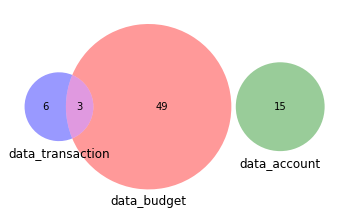

In [73]:
budget_set=set(df_budget.columns)
account_set=set(df_account.columns)
transaction_set=set(df_transaction.columns)
v=venn3([budget_set, account_set,transaction_set])
v.get_label_by_id('A').set_text('data_budget')
v.get_label_by_id('B').set_text('data_account')
v.get_label_by_id('C').set_text('data_transaction')
plt.show()

In [74]:
print(budget_set&transaction_set)

{'Leisure', 'amount', 'Healthcare'}


In [75]:
df_budget=df_budget.rename({'amount':'amount_bgt','Leisure':'Leisure_bgt','Healthcare':'Healthcare_bgt','Dining':'Dining_bgt', 
                            'Education':'Education_bgt' , 'Home / Family':'Home_bgt', 'Property':'Property_bgt'}, axis='columns')

In [76]:
df=df_account.join(df_budget)
df=df.join(df_transaction)

In [77]:
df.shape

(1287, 76)

In [78]:
df.to_csv("../data/clean_data.csv")